In [67]:
import pandas as pd 
import numpy as np 
import sklearn
import seaborn as sns 
import matplotlib.pyplot as plt


In [68]:
# Data cleaning
data = pd.read_csv(r"H:\Classical_ML\Data\synthetic_health_data.csv")
data.head()



,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
0,45.960570,31.996777,5,55.403270,7.300359,0,2.834707,70.542122
1,38.340828,29.623168,6,41.838357,7.012419,1,7.199517,57.244637
2,47.772262,25.298152,5,76.904948,6.028641,1,4.097944,96.333722
3,58.276358,21.765316,2,49.756767,5.802714,1,3.649377,61.321783
4,37.190160,28.491117,2,44.218737,7.912548,0,2.839795,67.175894


In [69]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features & target
X = data[["Age"]]             # 2D dataframe
y = data["Health_Score"]      # 1D series

kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    # Split the data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Metrics
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Display results
print("MSE scores:", mse_scores)
print("Average MSE:", np.mean(mse_scores))
print("R2 scores:", r2_scores)
print("Average R2:", np.mean(r2_scores))


MSE scores: [182.1846079501716, 197.96795187076688, 170.17183642083023, 158.99285553175525, 192.0152735052303]
Average MSE: 180.26650505575086
R2 scores: [0.06553677111083278, 0.004964979664850988, -0.0399221417810951, 0.04401157282365342, 0.04642507568221088]
Average R2: 0.024203251500090596


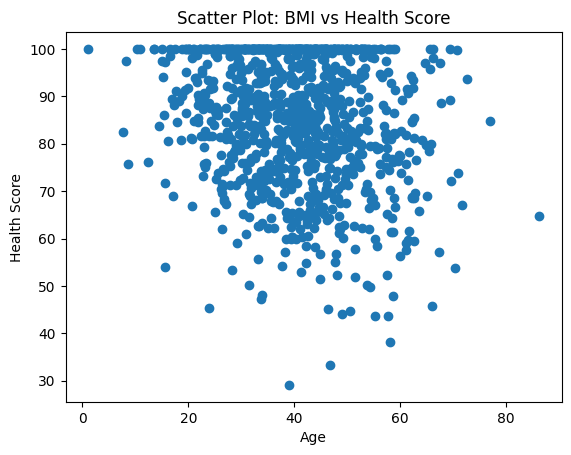

In [70]:
import matplotlib.pyplot as plt

plt.scatter(data["Age"], data["Health_Score"])
plt.xlabel("Age")
plt.ylabel("Health Score")
plt.title("Scatter Plot: BMI vs Health Score")
plt.show()


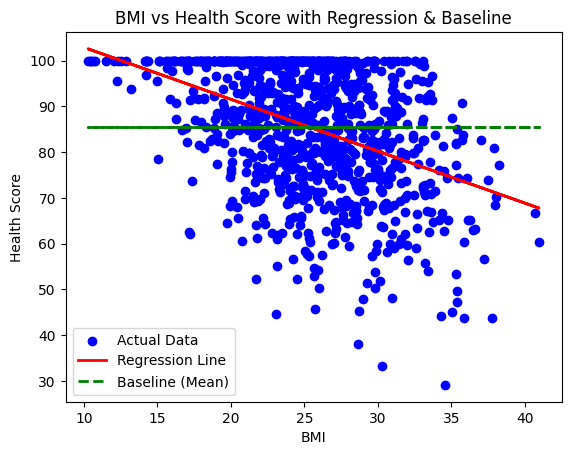

In [71]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Feature & target
X = data[["BMI"]]
y = data["Health_Score"]

# Fit linear regression
model = LinearRegression()
scaler = StandardScaler()
model.fit(X, y)

# Regression predictions
y_pred = model.predict(X)

# Baseline (mean of target)
y_baseline = np.full_like(y, fill_value=y.mean(), dtype=np.float64)

# Plot
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.plot(X, y_baseline, color='green', linestyle='--', linewidth=2, label='Baseline (Mean)')
plt.xlabel("BMI")
plt.ylabel("Health Score")
plt.title("BMI vs Health Score with Regression & Baseline")
plt.legend()
plt.show()


In [72]:
mse = mean_squared_error(y,y_pred)
score = r2_score(y,y_pred)

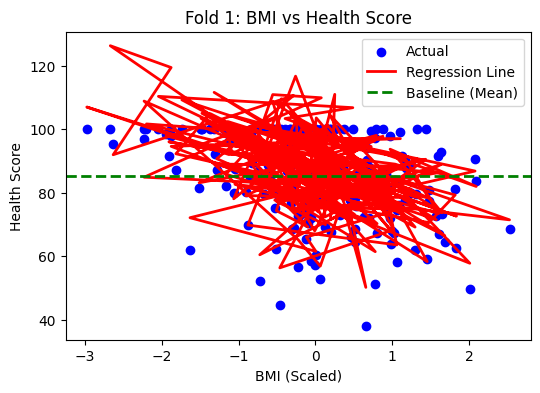

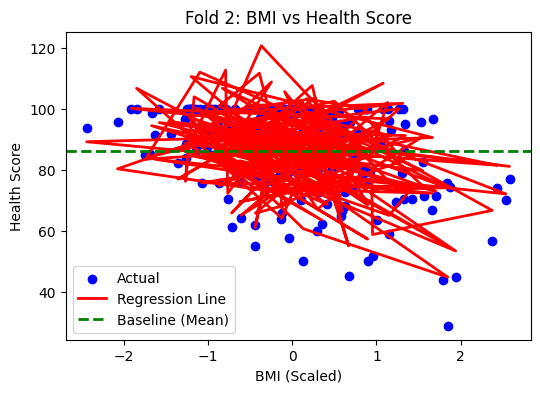

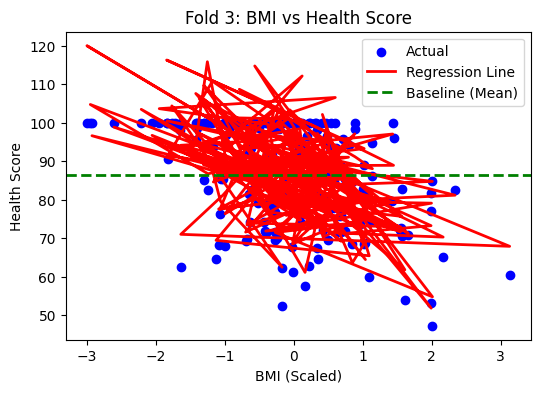

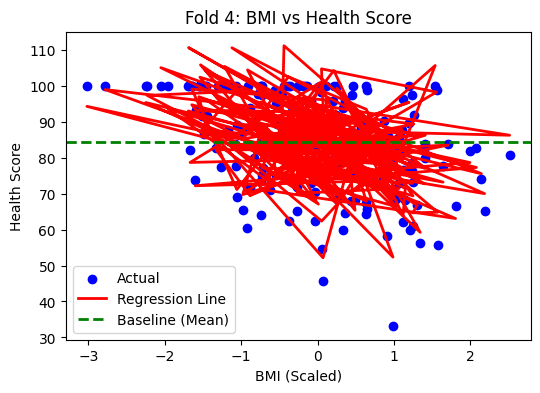

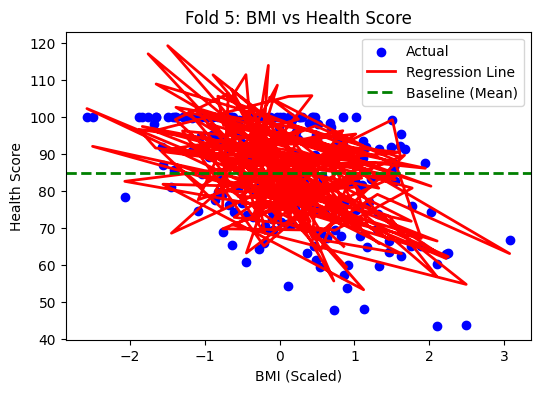

MSE scores per fold: [37.241882757268456, 31.281050405732582, 31.750855168148, 26.838907362471208, 32.76938514831002]
Average MSE: 31.97641616838605
R2 scores per fold: [0.808978538841288, 0.8427738412584489, 0.8059701416855596, 0.8386236617314168, 0.8372626125395747]
Average R2: 0.8267217592112577


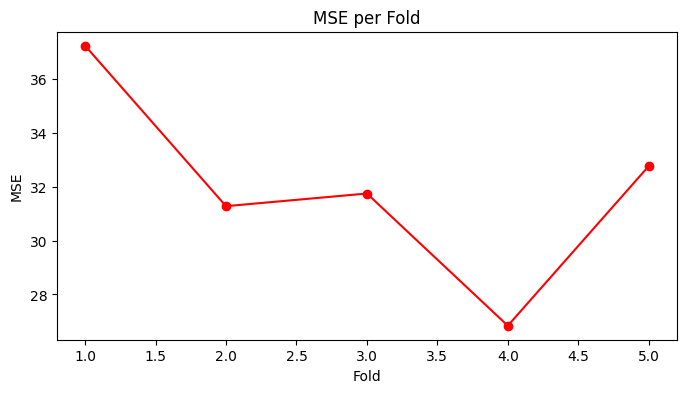

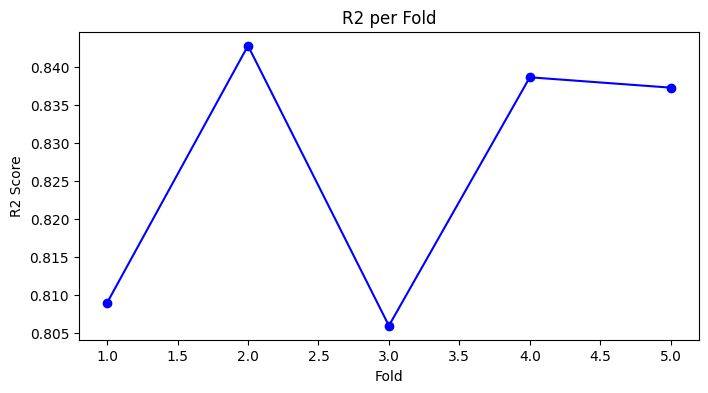


Mutual Information of each feature:
Age: 0.0304
BMI: 0.1225
Exercise_Frequency: 0.0302
Diet_Quality: 0.3234
Sleep_Hours: 0.0797
Smoking_Status: 0.0000
Alcohol_Consumption: 0.0541

✅ Results saved as 'kfold_metrics.csv' and 'mutual_information.csv'


In [73]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression

# -----------------------------
# 1️⃣ Features and Target
# -----------------------------
features = ["Age", "BMI", "Exercise_Frequency", "Diet_Quality",
            "Sleep_Hours", "Smoking_Status", "Alcohol_Consumption"]
target = "Health_Score"

X = data[features]
y = data[target]

# -----------------------------
# 2️⃣ Scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 3️⃣ K-Fold CV Setup
# -----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

mse_scores = []
r2_scores = []

fold = 1

for train_index, test_index in kf.split(X_scaled):
    # Split data
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    # -----------------------------
    # 4️⃣ Scatter Plots (Optional: Only using BMI for plotting clarity)
    # -----------------------------
    plt.figure(figsize=(6,4))
    plt.scatter(X_test[:, features.index("BMI")], y_test, color='blue', label='Actual')
    plt.plot(X_test[:, features.index("BMI")], y_pred, color='red', linewidth=2, label='Regression Line')
    plt.axhline(y=y_test.mean(), color='green', linestyle='--', linewidth=2, label='Baseline (Mean)')
    plt.xlabel("BMI (Scaled)")
    plt.ylabel("Health Score")
    plt.title(f"Fold {fold}: BMI vs Health Score")
    plt.legend()
    plt.show()
    
    fold += 1

# -----------------------------
# 5️⃣ Metrics
# -----------------------------
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

print("MSE scores per fold:", mse_scores)
print("Average MSE:", avg_mse)
print("R2 scores per fold:", r2_scores)
print("Average R2:", avg_r2)

# -----------------------------
# 6️⃣ Plot MSE & R2 per Fold
# -----------------------------
plt.figure(figsize=(8,4))
plt.plot(range(1,6), mse_scores, marker='o', linestyle='-', color='red')
plt.title("MSE per Fold")
plt.xlabel("Fold")
plt.ylabel("MSE")
plt.show()

plt.figure(figsize=(8,4))
plt.plot(range(1,6), r2_scores, marker='o', linestyle='-', color='blue')
plt.title("R2 per Fold")
plt.xlabel("Fold")
plt.ylabel("R2 Score")
plt.show()

# -----------------------------
# 7️⃣ Mutual Information
# -----------------------------
mi = mutual_info_regression(X_scaled, y)
mi_dict = dict(zip(features, mi))

print("\nMutual Information of each feature:")
for f, score in mi_dict.items():
    print(f"{f}: {score:.4f}")

# -----------------------------
# 8️⃣ Save final results
# -----------------------------
results = {
    "Average MSE": avg_mse,
    "Average R2": avg_r2,
    "MSE per fold": mse_scores,
    "R2 per fold": r2_scores,
    "Mutual Information": mi_dict
}

# Save to CSV for future reference
results_df = pd.DataFrame({
    "Fold": list(range(1,6)),
    "MSE": mse_scores,
    "R2": r2_scores
})
results_df.to_csv("kfold_metrics.csv", index=False)

mi_df = pd.DataFrame(list(mi_dict.items()), columns=["Feature", "Mutual Information"])
mi_df.to_csv("mutual_information.csv", index=False)

print("\n✅ Results saved as 'kfold_metrics.csv' and 'mutual_information.csv'")


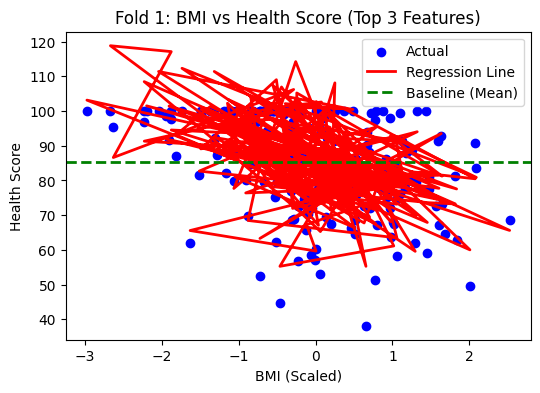

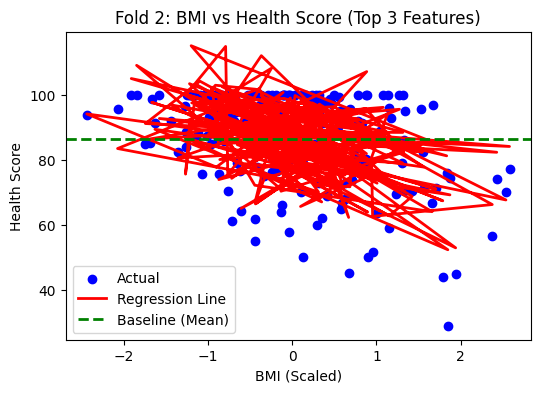

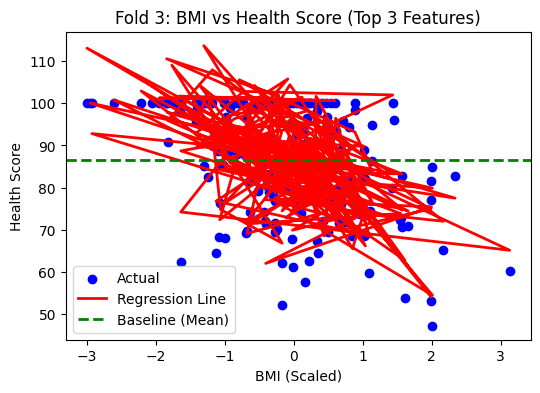

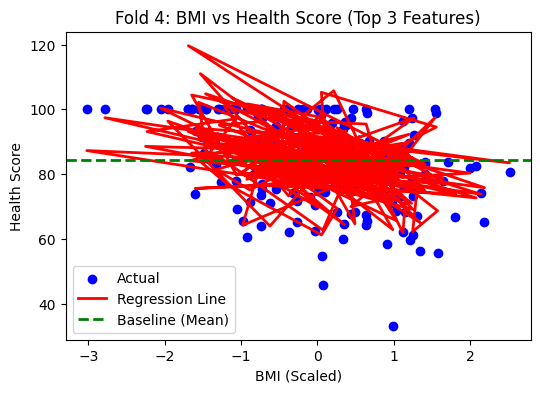

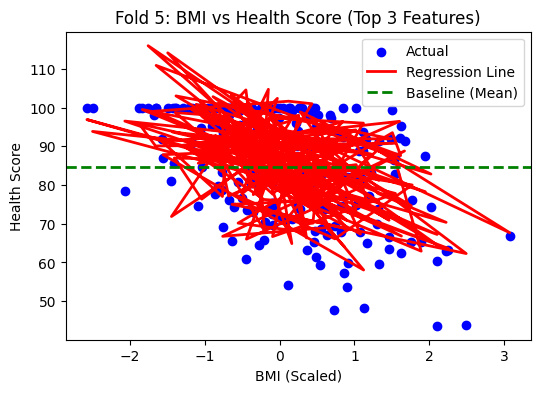

MSE scores per fold: [59.23852966080807, 58.25343751739749, 50.14886663356219, 60.84924965144455, 61.50937256998996]
Average MSE: 57.99989120664045
R2 scores per fold: [0.6961531035781814, 0.7072040709773324, 0.6935396720494882, 0.6341270915942072, 0.6945357823753266]
Average R2: 0.6851119441149072


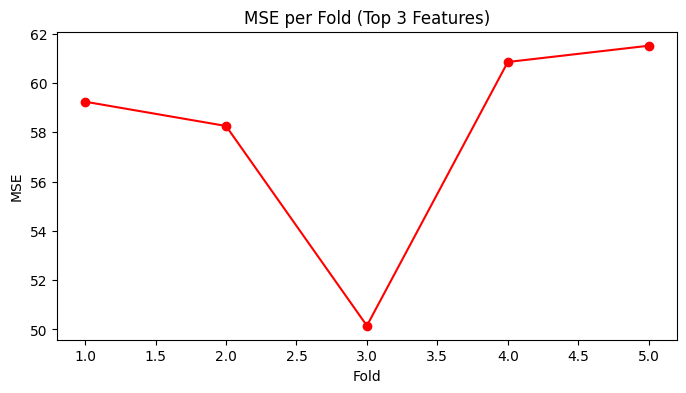

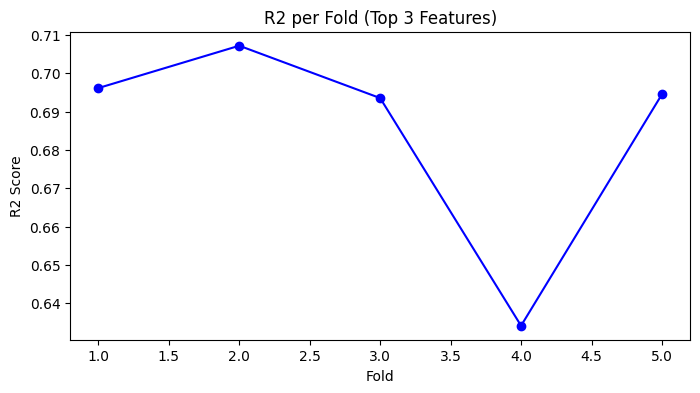


Mutual Information of top 3 features:
Diet_Quality: 0.3255
BMI: 0.1225
Sleep_Hours: 0.0794

✅ Results saved as 'kfold_metrics_top3.csv' and 'mutual_information_top3.csv'


In [74]:
# Keeping only the high important feature based on MI 

# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression

# -----------------------------
# 1️⃣ Keep top 3 features
# -----------------------------
top_features = ["Diet_Quality", "BMI", "Sleep_Hours"]
target = "Health_Score"

X = data[top_features]
y = data[target]

# -----------------------------
# 2️⃣ Scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 3️⃣ K-Fold CV Setup
# -----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

mse_scores = []
r2_scores = []

fold = 1

for train_index, test_index in kf.split(X_scaled):
    # Split data
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    # -----------------------------
    # 4️⃣ Scatter Plot for BMI vs Health Score (for visualization)
    # -----------------------------
    plt.figure(figsize=(6,4))
    plt.scatter(X_test[:, top_features.index("BMI")], y_test, color='blue', label='Actual')
    plt.plot(X_test[:, top_features.index("BMI")], y_pred, color='red', linewidth=2, label='Regression Line')
    plt.axhline(y=y_test.mean(), color='green', linestyle='--', linewidth=2, label='Baseline (Mean)')
    plt.xlabel("BMI (Scaled)")
    plt.ylabel("Health Score")
    plt.title(f"Fold {fold}: BMI vs Health Score (Top 3 Features)")
    plt.legend()
    plt.show()
    
    fold += 1

# -----------------------------
# 5️⃣ Metrics
# -----------------------------
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

print("MSE scores per fold:", mse_scores)
print("Average MSE:", avg_mse)
print("R2 scores per fold:", r2_scores)
print("Average R2:", avg_r2)

# -----------------------------
# 6️⃣ Plot MSE & R2 per Fold
# -----------------------------
plt.figure(figsize=(8,4))
plt.plot(range(1,6), mse_scores, marker='o', linestyle='-', color='red')
plt.title("MSE per Fold (Top 3 Features)")
plt.xlabel("Fold")
plt.ylabel("MSE")
plt.show()

plt.figure(figsize=(8,4))
plt.plot(range(1,6), r2_scores, marker='o', linestyle='-', color='blue')
plt.title("R2 per Fold (Top 3 Features)")
plt.xlabel("Fold")
plt.ylabel("R2 Score")
plt.show()

# -----------------------------
# 7️⃣ Mutual Information of Top 3 Features
# -----------------------------
mi = mutual_info_regression(X_scaled, y)
mi_dict = dict(zip(top_features, mi))

print("\nMutual Information of top 3 features:")
for f, score in mi_dict.items():
    print(f"{f}: {score:.4f}")

# -----------------------------
# 8️⃣ Save final results
# -----------------------------
results = {
    "Average MSE": avg_mse,
    "Average R2": avg_r2,
    "MSE per fold": mse_scores,
    "R2 per fold": r2_scores,
    "Mutual Information": mi_dict
}

# Save metrics to CSV
results_df = pd.DataFrame({
    "Fold": list(range(1,6)),
    "MSE": mse_scores,
    "R2": r2_scores
})
results_df.to_csv("kfold_metrics_top3.csv", index=False)

mi_df = pd.DataFrame(list(mi_dict.items()), columns=["Feature", "Mutual Information"])
mi_df.to_csv("mutual_information_top3.csv", index=False)

print("\n✅ Results saved as 'kfold_metrics_top3.csv' and 'mutual_information_top3.csv'")


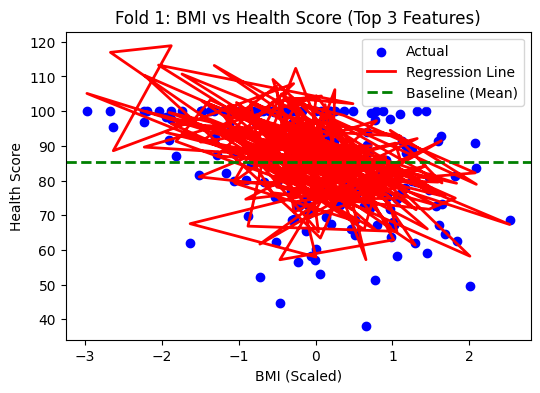

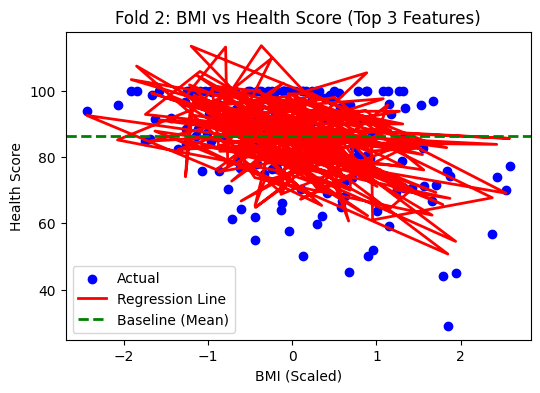

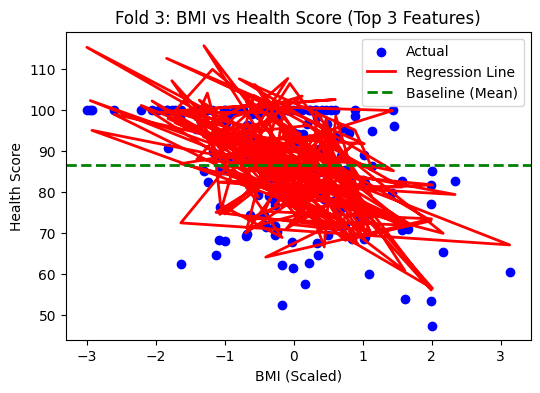

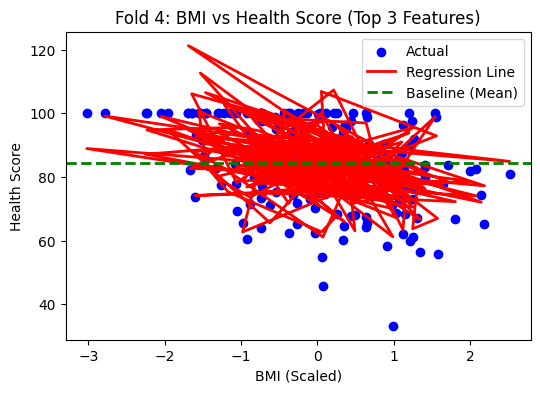

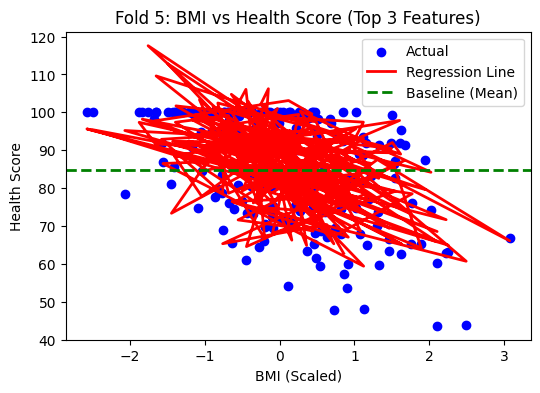

MSE scores per fold: [58.22614036586152, 54.688014713828586, 52.29902503361948, 56.361050296191195, 55.83614287882843]
Average MSE: 55.48207465766584
R2 scores per fold: [0.7013458615180141, 0.7251247521700566, 0.6804000281719511, 0.6611136289963586, 0.7227098410042587]
Average R2: 0.6981388223721278


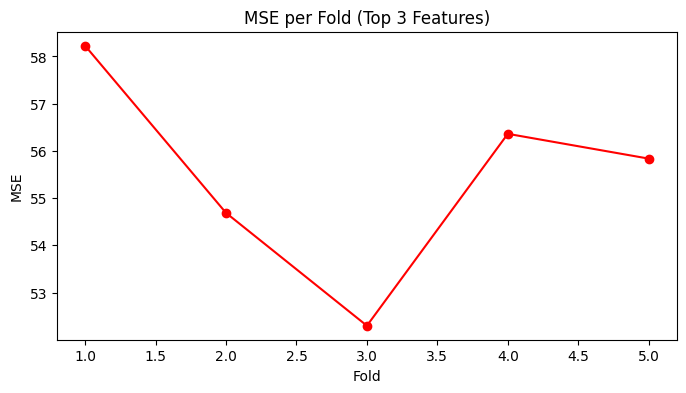

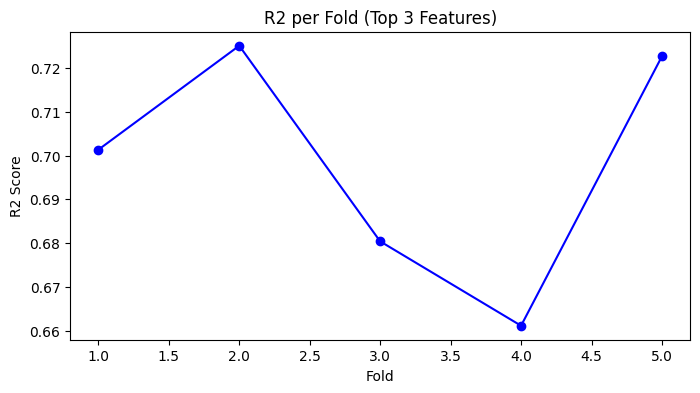


Mutual Information of top 3 features:
Diet_Quality: 0.3249
BMI: 0.1232
Smoking_Status: 0.0000
Sleep_Hours: 0.0807

✅ Results saved as 'kfold_metrics_top3.csv' and 'mutual_information_top3.csv'


In [75]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression

# -----------------------------
# 1️⃣ Keep top 3 features
# -----------------------------
top_features = ["Diet_Quality", "BMI", "Smoking_Status","Sleep_Hours"]
target = "Health_Score"

X = data[top_features]
y = data[target]

# -----------------------------
# 2️⃣ Scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 3️⃣ K-Fold CV Setup
# -----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

mse_scores = []
r2_scores = []

fold = 1

for train_index, test_index in kf.split(X_scaled):
    # Split data
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    # -----------------------------
    # 4️⃣ Scatter Plot for BMI vs Health Score (for visualization)
    # -----------------------------
    plt.figure(figsize=(6,4))
    plt.scatter(X_test[:, top_features.index("BMI")], y_test, color='blue', label='Actual')
    plt.plot(X_test[:, top_features.index("BMI")], y_pred, color='red', linewidth=2, label='Regression Line')
    plt.axhline(y=y_test.mean(), color='green', linestyle='--', linewidth=2, label='Baseline (Mean)')
    plt.xlabel("BMI (Scaled)")
    plt.ylabel("Health Score")
    plt.title(f"Fold {fold}: BMI vs Health Score (Top 3 Features)")
    plt.legend()
    plt.show()
    
    fold += 1

# -----------------------------
# 5️⃣ Metrics
# -----------------------------
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

print("MSE scores per fold:", mse_scores)
print("Average MSE:", avg_mse)
print("R2 scores per fold:", r2_scores)
print("Average R2:", avg_r2)

# -----------------------------
# 6️⃣ Plot MSE & R2 per Fold
# -----------------------------
plt.figure(figsize=(8,4))
plt.plot(range(1,6), mse_scores, marker='o', linestyle='-', color='red')
plt.title("MSE per Fold (Top 3 Features)")
plt.xlabel("Fold")
plt.ylabel("MSE")
plt.show()

plt.figure(figsize=(8,4))
plt.plot(range(1,6), r2_scores, marker='o', linestyle='-', color='blue')
plt.title("R2 per Fold (Top 3 Features)")
plt.xlabel("Fold")
plt.ylabel("R2 Score")
plt.show()

# -----------------------------
# 7️⃣ Mutual Information of Top 3 Features
# -----------------------------
mi = mutual_info_regression(X_scaled, y)
mi_dict = dict(zip(top_features, mi))

print("\nMutual Information of top 3 features:")
for f, score in mi_dict.items():
    print(f"{f}: {score:.4f}")

# -----------------------------
# 8️⃣ Save final results
# -----------------------------
results = {
    "Average MSE": avg_mse,
    "Average R2": avg_r2,
    "MSE per fold": mse_scores,
    "R2 per fold": r2_scores,
    "Mutual Information": mi_dict
}

# Save metrics to CSV
results_df = pd.DataFrame({
    "Fold": list(range(1,6)),
    "MSE": mse_scores,
    "R2": r2_scores
})
results_df.to_csv("kfold_metrics_top3.csv", index=False)

mi_df = pd.DataFrame(list(mi_dict.items()), columns=["Feature", "Mutual Information"])
mi_df.to_csv("mutual_information_top3.csv", index=False)

print("\n✅ Results saved as 'kfold_metrics_top3.csv' and 'mutual_information_top3.csv'")


MSE: 37.9241
R2: 0.8140


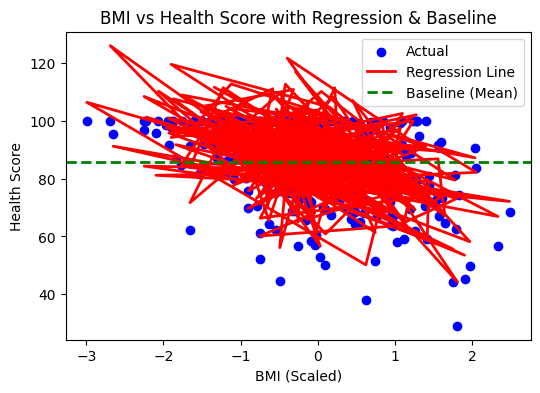


Mutual Information of each feature:
Age: 0.0101
BMI: 0.1041
Exercise_Frequency: 0.0429
Diet_Quality: 0.2732
Sleep_Hours: 0.0632
Smoking_Status: 0.0000
Alcohol_Consumption: 0.0693

✅ Results saved as 'train_test_metrics.csv' and 'mutual_information_train_test.csv'


In [76]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression

# -----------------------------
# 1️⃣ Features and Target
# -----------------------------
features = ["Age", "BMI", "Exercise_Frequency", "Diet_Quality",
            "Sleep_Hours", "Smoking_Status", "Alcohol_Consumption"]
target = "Health_Score"

X = data[features]
y = data[target]

# -----------------------------
# 2️⃣ Train-Test Split (70-30)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -----------------------------
# 3️⃣ Scaling
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 4️⃣ Train Linear Regression
# -----------------------------
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# -----------------------------
# 5️⃣ Predictions
# -----------------------------
y_pred = model.predict(X_test_scaled)

# -----------------------------
# 6️⃣ Metrics
# -----------------------------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

# -----------------------------
# 7️⃣ Scatter Plot (BMI vs Health Score)
# -----------------------------
plt.figure(figsize=(6,4))
plt.scatter(X_test_scaled[:, features.index("BMI")], y_test, color='blue', label='Actual')
plt.plot(X_test_scaled[:, features.index("BMI")], y_pred, color='red', linewidth=2, label='Regression Line')
plt.axhline(y=y_test.mean(), color='green', linestyle='--', linewidth=2, label='Baseline (Mean)')
plt.xlabel("BMI (Scaled)")
plt.ylabel("Health Score")
plt.title("BMI vs Health Score with Regression & Baseline")
plt.legend()
plt.show()

# -----------------------------
# 8️⃣ Mutual Information (All Features)
# -----------------------------
mi = mutual_info_regression(X_train_scaled, y_train)
mi_dict = dict(zip(features, mi))

print("\nMutual Information of each feature:")
for f, score in mi_dict.items():
    print(f"{f}: {score:.4f}")

# -----------------------------
# 9️⃣ Save Metrics & MI
# -----------------------------
results = {
    "MSE": mse,
    "R2": r2,
    "Mutual Information": mi_dict
}

# Save to CSV
results_df = pd.DataFrame([{
    "MSE": mse,
    "R2": r2
}])
results_df.to_csv("train_test_metrics.csv", index=False)

mi_df = pd.DataFrame(list(mi_dict.items()), columns=["Feature", "Mutual Information"])
mi_df.to_csv("mutual_information_train_test.csv", index=False)

print("\n✅ Results saved as 'train_test_metrics.csv' and 'mutual_information_train_test.csv'")


Using Ridge Regression concept


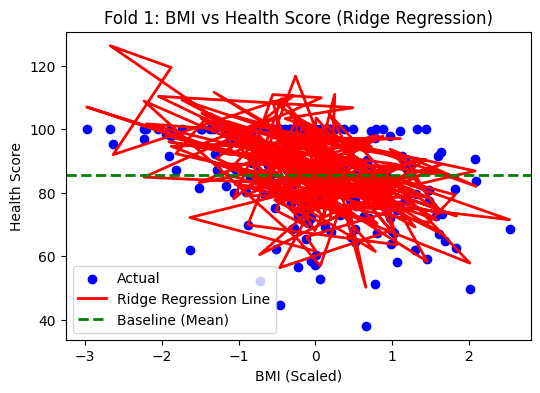

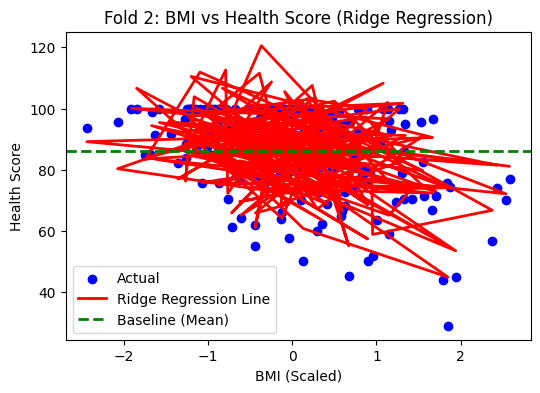

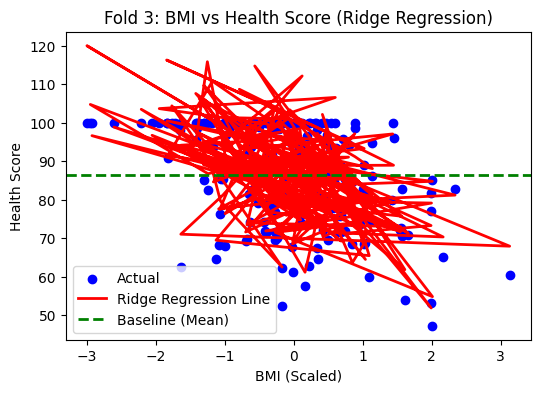

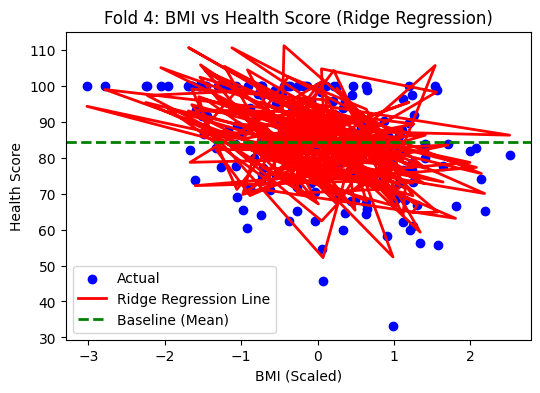

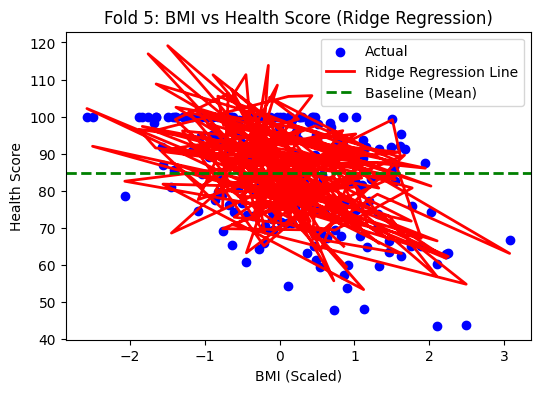

MSE scores per fold: [37.21635558151687, 31.289366217721916, 31.72958425557066, 26.858778797993708, 32.77362264021276]
Average MSE: 31.97354149860318
R2 scores per fold: [0.8091094731026707, 0.8427320439671514, 0.8061001284884896, 0.8385041792406637, 0.8372415685572565]
Average R2: 0.8267374786712463


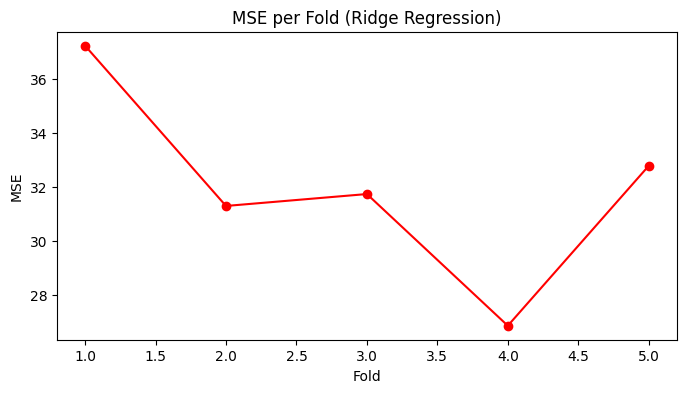

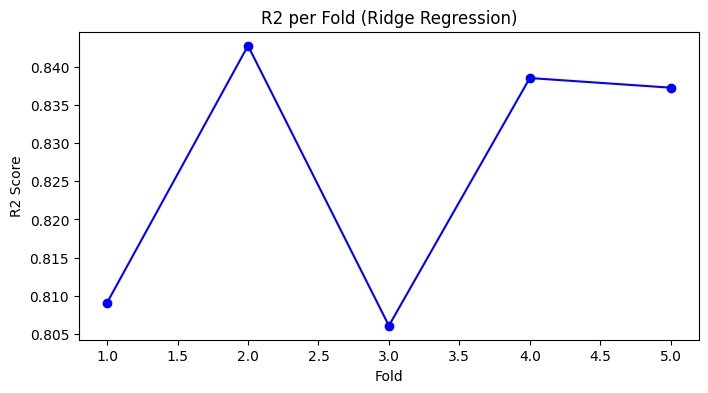


Mutual Information of each feature:
Age: 0.0319
BMI: 0.1232
Exercise_Frequency: 0.0257
Diet_Quality: 0.3255
Sleep_Hours: 0.0810
Smoking_Status: 0.0000
Alcohol_Consumption: 0.0525

✅ Results saved as 'kfold_ridge_metrics.csv' and 'mutual_information_ridge.csv'


In [77]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression

# -----------------------------
# 1️⃣ Features and Target
# -----------------------------
features = ["Age", "BMI", "Exercise_Frequency", "Diet_Quality",
            "Sleep_Hours", "Smoking_Status", "Alcohol_Consumption"]
target = "Health_Score"

X = data[features]
y = data[target]

# -----------------------------
# 2️⃣ Scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 3️⃣ K-Fold CV Setup (5 folds)
# -----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alpha = 1.0  # regularization strength, can tune this
model = Ridge(alpha=alpha)

mse_scores = []
r2_scores = []

fold = 1

for train_index, test_index in kf.split(X_scaled):
    # Split data
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    # -----------------------------
    # 4️⃣ Scatter Plot (BMI vs Health Score for visualization)
    # -----------------------------
    plt.figure(figsize=(6,4))
    plt.scatter(X_test[:, features.index("BMI")], y_test, color='blue', label='Actual')
    plt.plot(X_test[:, features.index("BMI")], y_pred, color='red', linewidth=2, label='Ridge Regression Line')
    plt.axhline(y=y_test.mean(), color='green', linestyle='--', linewidth=2, label='Baseline (Mean)')
    plt.xlabel("BMI (Scaled)")
    plt.ylabel("Health Score")
    plt.title(f"Fold {fold}: BMI vs Health Score (Ridge Regression)")
    plt.legend()
    plt.show()
    
    fold += 1

# -----------------------------
# 5️⃣ Metrics
# -----------------------------
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

print("MSE scores per fold:", mse_scores)
print("Average MSE:", avg_mse)
print("R2 scores per fold:", r2_scores)
print("Average R2:", avg_r2)

# -----------------------------
# 6️⃣ Plot MSE & R2 per Fold
# -----------------------------
plt.figure(figsize=(8,4))
plt.plot(range(1,6), mse_scores, marker='o', linestyle='-', color='red')
plt.title("MSE per Fold (Ridge Regression)")
plt.xlabel("Fold")
plt.ylabel("MSE")
plt.show()

plt.figure(figsize=(8,4))
plt.plot(range(1,6), r2_scores, marker='o', linestyle='-', color='blue')
plt.title("R2 per Fold (Ridge Regression)")
plt.xlabel("Fold")
plt.ylabel("R2 Score")
plt.show()

# -----------------------------
# 7️⃣ Mutual Information (All Features)
# -----------------------------
mi = mutual_info_regression(X_scaled, y)
mi_dict = dict(zip(features, mi))

print("\nMutual Information of each feature:")
for f, score in mi_dict.items():
    print(f"{f}: {score:.4f}")

# -----------------------------
# 8️⃣ Save final results
# -----------------------------
results = {
    "Average MSE": avg_mse,
    "Average R2": avg_r2,
    "MSE per fold": mse_scores,
    "R2 per fold": r2_scores,
    "Mutual Information": mi_dict
}

# Save metrics to CSV
results_df = pd.DataFrame({
    "Fold": list(range(1,6)),
    "MSE": mse_scores,
    "R2": r2_scores
})
results_df.to_csv("kfold_ridge_metrics.csv", index=False)

mi_df = pd.DataFrame(list(mi_dict.items()), columns=["Feature", "Mutual Information"])
mi_df.to_csv("mutual_information_ridge.csv", index=False)

print("\n✅ Results saved as 'kfold_ridge_metrics.csv' and 'mutual_information_ridge.csv'")


Lasso Regression 


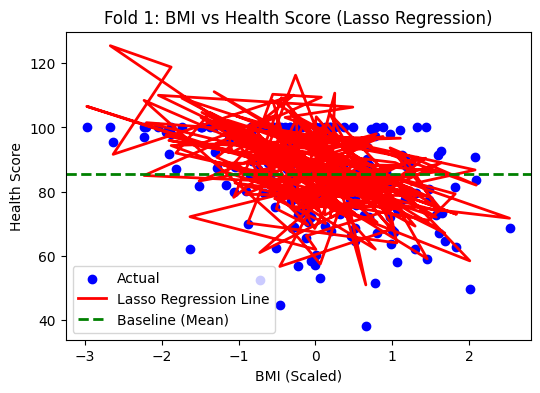

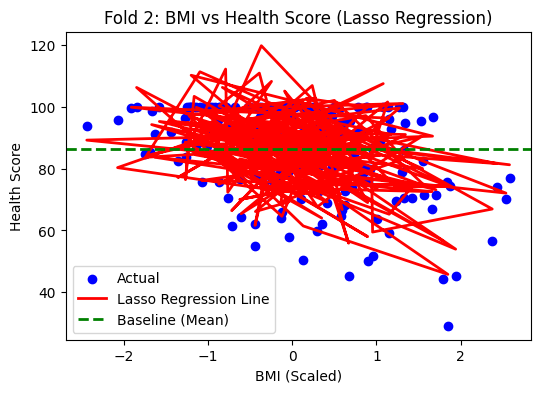

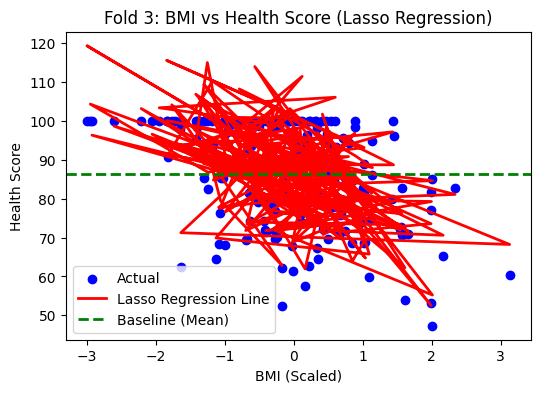

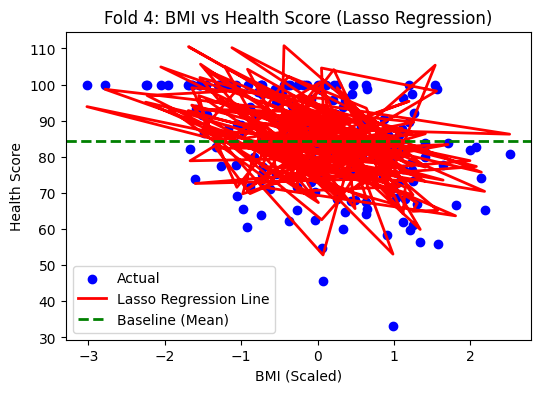

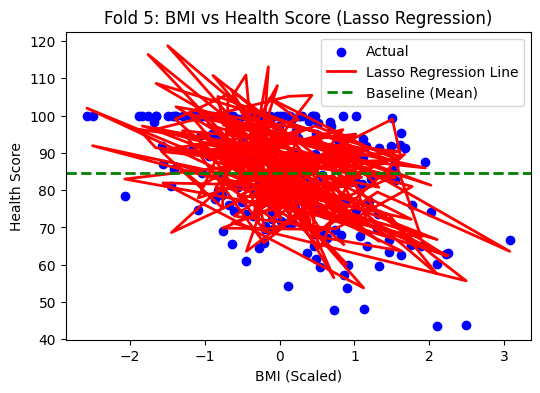

MSE scores per fold: [36.79785559560671, 31.423989167127374, 31.329513361972012, 27.36352518534077, 33.24282171948599]
Average MSE: 32.03154100590657
R2 scores per fold: [0.8112560476817406, 0.8420553963182094, 0.8085449665374045, 0.8354692522727252, 0.8349114597677818]
Average R2: 0.8264474245155723


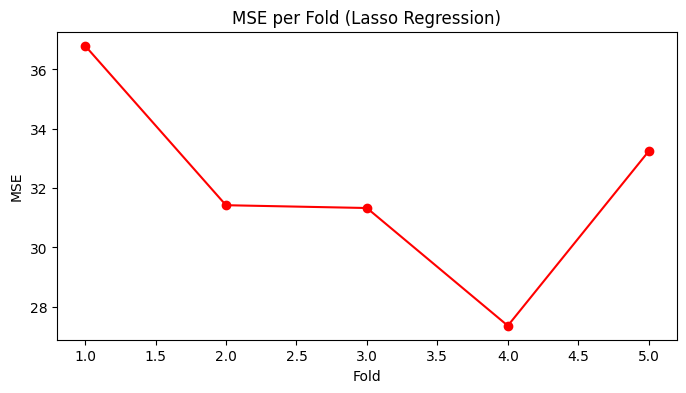

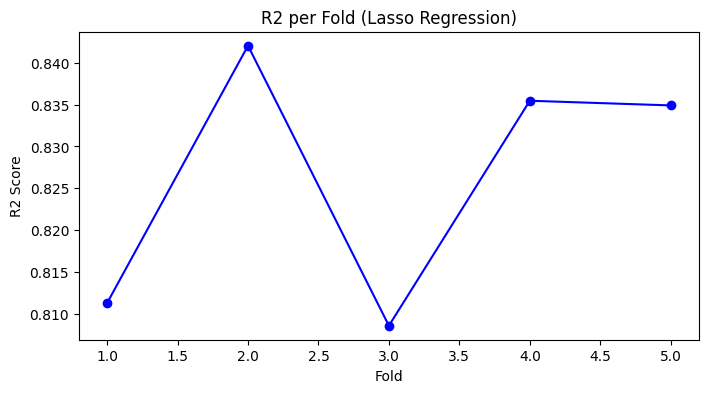


Mutual Information of each feature:
Age: 0.0311
BMI: 0.1244
Exercise_Frequency: 0.0445
Diet_Quality: 0.3257
Sleep_Hours: 0.0804
Smoking_Status: 0.0080
Alcohol_Consumption: 0.0508

Lasso Regression Coefficients:
Age: -2.7306
BMI: -5.3969
Exercise_Frequency: 3.6464
Diet_Quality: 9.0321
Sleep_Hours: 3.4705
Smoking_Status: -1.4940
Alcohol_Consumption: -1.6040

✅ Results saved as 'kfold_lasso_metrics.csv', 'mutual_information_lasso.csv', and 'lasso_coefficients.csv'


In [78]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression

# -----------------------------
# 1️⃣ Features and Target
# -----------------------------
features = ["Age", "BMI", "Exercise_Frequency", "Diet_Quality",
            "Sleep_Hours", "Smoking_Status", "Alcohol_Consumption"]
target = "Health_Score"

X = data[features]
y = data[target]

# -----------------------------
# 2️⃣ Scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 3️⃣ K-Fold CV Setup (5 folds)
# -----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alpha = 0.1  # regularization strength, can tune
model = Lasso(alpha=alpha, max_iter=10000)

mse_scores = []
r2_scores = []

fold = 1

for train_index, test_index in kf.split(X_scaled):
    # Split data
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    # -----------------------------
    # 4️⃣ Scatter Plot (BMI vs Health Score for visualization)
    # -----------------------------
    plt.figure(figsize=(6,4))
    plt.scatter(X_test[:, features.index("BMI")], y_test, color='blue', label='Actual')
    plt.plot(X_test[:, features.index("BMI")], y_pred, color='red', linewidth=2, label='Lasso Regression Line')
    plt.axhline(y=y_test.mean(), color='green', linestyle='--', linewidth=2, label='Baseline (Mean)')
    plt.xlabel("BMI (Scaled)")
    plt.ylabel("Health Score")
    plt.title(f"Fold {fold}: BMI vs Health Score (Lasso Regression)")
    plt.legend()
    plt.show()
    
    fold += 1

# -----------------------------
# 5️⃣ Metrics
# -----------------------------
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

print("MSE scores per fold:", mse_scores)
print("Average MSE:", avg_mse)
print("R2 scores per fold:", r2_scores)
print("Average R2:", avg_r2)

# -----------------------------
# 6️⃣ Plot MSE & R2 per Fold
# -----------------------------
plt.figure(figsize=(8,4))
plt.plot(range(1,6), mse_scores, marker='o', linestyle='-', color='red')
plt.title("MSE per Fold (Lasso Regression)")
plt.xlabel("Fold")
plt.ylabel("MSE")
plt.show()

plt.figure(figsize=(8,4))
plt.plot(range(1,6), r2_scores, marker='o', linestyle='-', color='blue')
plt.title("R2 per Fold (Lasso Regression)")
plt.xlabel("Fold")
plt.ylabel("R2 Score")
plt.show()

# -----------------------------
# 7️⃣ Mutual Information (All Features)
# -----------------------------
mi = mutual_info_regression(X_scaled, y)
mi_dict = dict(zip(features, mi))

print("\nMutual Information of each feature:")
for f, score in mi_dict.items():
    print(f"{f}: {score:.4f}")

# -----------------------------
# 8️⃣ Lasso Coefficients (Feature Selection)
# -----------------------------
coef_dict = dict(zip(features, model.coef_))
print("\nLasso Regression Coefficients:")
for f, coef in coef_dict.items():
    print(f"{f}: {coef:.4f}")

# -----------------------------
# 9️⃣ Save final results
# -----------------------------
results = {
    "Average MSE": avg_mse,
    "Average R2": avg_r2,
    "MSE per fold": mse_scores,
    "R2 per fold": r2_scores,
    "Mutual Information": mi_dict,
    "Lasso Coefficients": coef_dict
}

# Save metrics to CSV
results_df = pd.DataFrame({
    "Fold": list(range(1,6)),
    "MSE": mse_scores,
    "R2": r2_scores
})
results_df.to_csv("kfold_lasso_metrics.csv", index=False)

mi_df = pd.DataFrame(list(mi_dict.items()), columns=["Feature", "Mutual Information"])
mi_df.to_csv("mutual_information_lasso.csv", index=False)

coef_df = pd.DataFrame(list(coef_dict.items()), columns=["Feature", "Lasso Coefficient"])
coef_df.to_csv("lasso_coefficients.csv", index=False)

print("\n✅ Results saved as 'kfold_lasso_metrics.csv', 'mutual_information_lasso.csv', and 'lasso_coefficients.csv'")


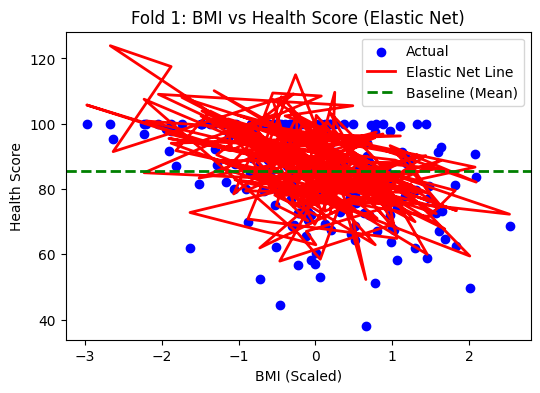

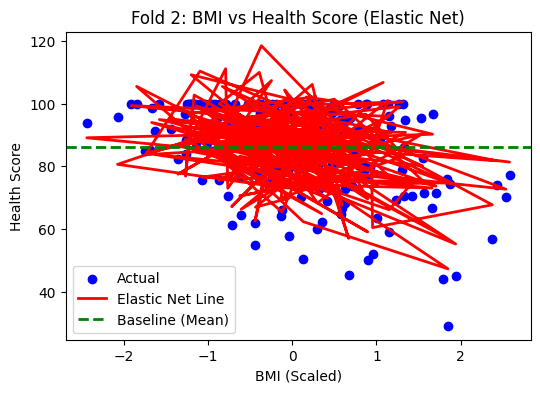

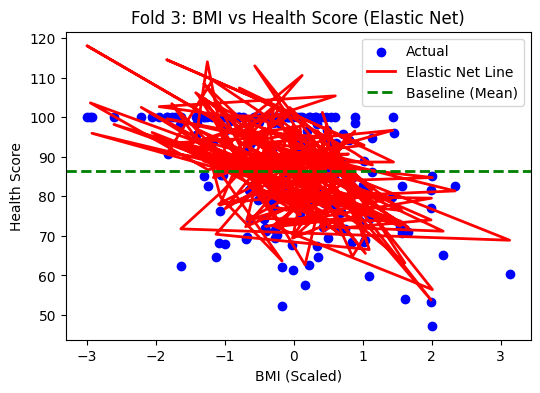

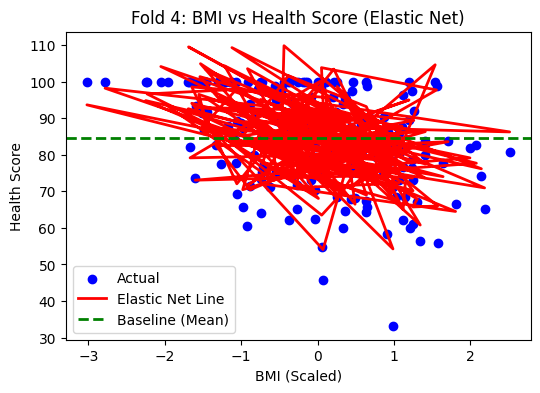

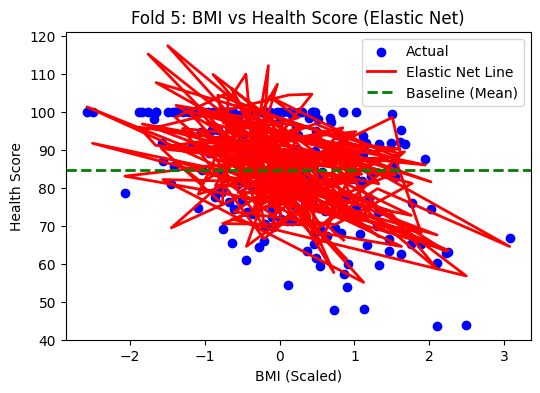

MSE scores per fold: [36.613518429303475, 32.164327979355036, 31.17931543071885, 28.20019464298408, 33.68778307293213]
Average MSE: 32.369027911058716
R2 scores per fold: [0.8122015518358299, 0.8383342735904218, 0.8094628279041562, 0.8304385462312254, 0.8327017189425282]
Average R2: 0.8246277837008323


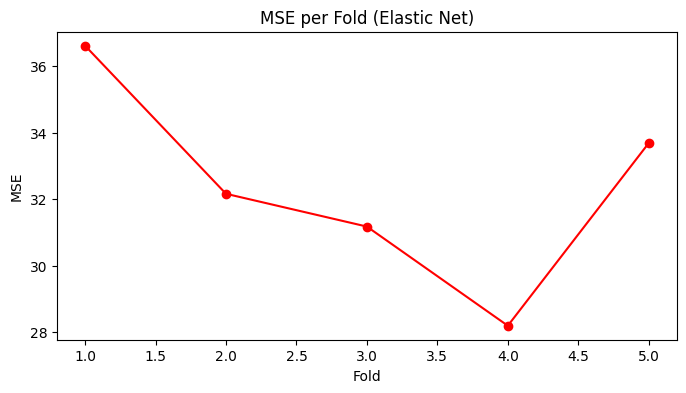

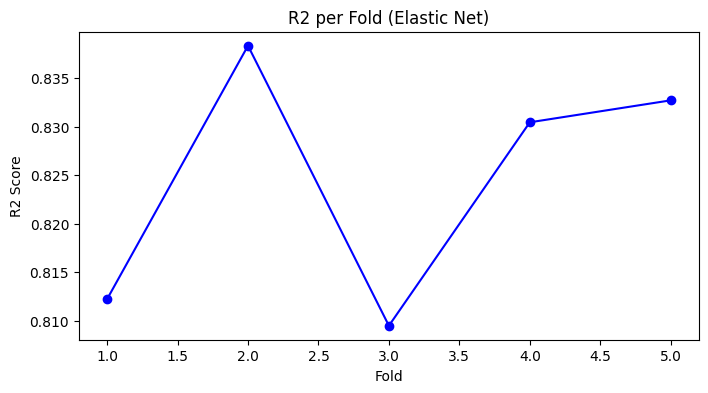


Mutual Information of each feature:
Age: 0.0288
BMI: 0.1254
Exercise_Frequency: 0.0203
Diet_Quality: 0.3227
Sleep_Hours: 0.0812
Smoking_Status: 0.0000
Alcohol_Consumption: 0.0519

Elastic Net Regression Coefficients:
Age: -2.6312
BMI: -5.1842
Exercise_Frequency: 3.5001
Diet_Quality: 8.6580
Sleep_Hours: 3.3469
Smoking_Status: -1.4508
Alcohol_Consumption: -1.5845

✅ Results saved as 'kfold_elasticnet_metrics.csv', 'mutual_information_elasticnet.csv', and 'elasticnet_coefficients.csv'


In [79]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression

# -----------------------------
# 1️⃣ Features and Target
# -----------------------------
features = ["Age", "BMI", "Exercise_Frequency", "Diet_Quality",
            "Sleep_Hours", "Smoking_Status", "Alcohol_Consumption"]
target = "Health_Score"

X = data[features]
y = data[target]

# -----------------------------
# 2️⃣ Scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 3️⃣ K-Fold CV Setup (5 folds)
# -----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Elastic Net parameters
alpha = 0.1   # overall regularization strength
l1_ratio = 0.5  # balance between L1 (Lasso) and L2 (Ridge)

model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)

mse_scores = []
r2_scores = []

fold = 1

for train_index, test_index in kf.split(X_scaled):
    # Split data
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    # -----------------------------
    # 4️⃣ Scatter Plot (BMI vs Health Score for visualization)
    # -----------------------------
    plt.figure(figsize=(6,4))
    plt.scatter(X_test[:, features.index("BMI")], y_test, color='blue', label='Actual')
    plt.plot(X_test[:, features.index("BMI")], y_pred, color='red', linewidth=2, label='Elastic Net Line')
    plt.axhline(y=y_test.mean(), color='green', linestyle='--', linewidth=2, label='Baseline (Mean)')
    plt.xlabel("BMI (Scaled)")
    plt.ylabel("Health Score")
    plt.title(f"Fold {fold}: BMI vs Health Score (Elastic Net)")
    plt.legend()
    plt.show()
    
    fold += 1

# -----------------------------
# 5️⃣ Metrics
# -----------------------------
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

print("MSE scores per fold:", mse_scores)
print("Average MSE:", avg_mse)
print("R2 scores per fold:", r2_scores)
print("Average R2:", avg_r2)

# -----------------------------
# 6️⃣ Plot MSE & R2 per Fold
# -----------------------------
plt.figure(figsize=(8,4))
plt.plot(range(1,6), mse_scores, marker='o', linestyle='-', color='red')
plt.title("MSE per Fold (Elastic Net)")
plt.xlabel("Fold")
plt.ylabel("MSE")
plt.show()

plt.figure(figsize=(8,4))
plt.plot(range(1,6), r2_scores, marker='o', linestyle='-', color='blue')
plt.title("R2 per Fold (Elastic Net)")
plt.xlabel("Fold")
plt.ylabel("R2 Score")
plt.show()

# -----------------------------
# 7️⃣ Mutual Information (All Features)
# -----------------------------
mi = mutual_info_regression(X_scaled, y)
mi_dict = dict(zip(features, mi))

print("\nMutual Information of each feature:")
for f, score in mi_dict.items():
    print(f"{f}: {score:.4f}")

# -----------------------------
# 8️⃣ Elastic Net Coefficients
# -----------------------------
coef_dict = dict(zip(features, model.coef_))
print("\nElastic Net Regression Coefficients:")
for f, coef in coef_dict.items():
    print(f"{f}: {coef:.4f}")

# -----------------------------
# 9️⃣ Save final results
# -----------------------------
results = {
    "Average MSE": avg_mse,
    "Average R2": avg_r2,
    "MSE per fold": mse_scores,
    "R2 per fold": r2_scores,
    "Mutual Information": mi_dict,
    "Elastic Net Coefficients": coef_dict
}

# Save metrics to CSV
results_df = pd.DataFrame({
    "Fold": list(range(1,6)),
    "MSE": mse_scores,
    "R2": r2_scores
})
results_df.to_csv("kfold_elasticnet_metrics.csv", index=False)

mi_df = pd.DataFrame(list(mi_dict.items()), columns=["Feature", "Mutual Information"])
mi_df.to_csv("mutual_information_elasticnet.csv", index=False)

coef_df = pd.DataFrame(list(coef_dict.items()), columns=["Feature", "ElasticNet Coefficient"])
coef_df.to_csv("elasticnet_coefficients.csv", index=False)

print("\n✅ Results saved as 'kfold_elasticnet_metrics.csv', 'mutual_information_elasticnet.csv', and 'elasticnet_coefficients.csv'")


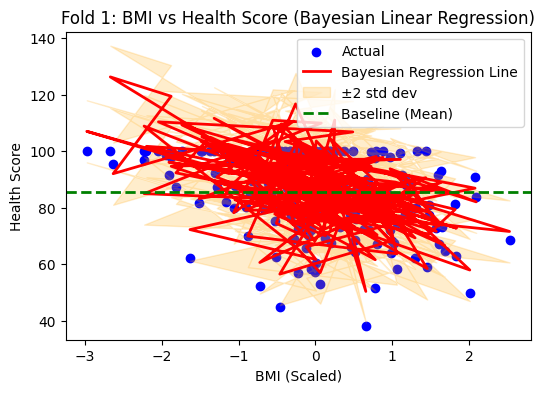

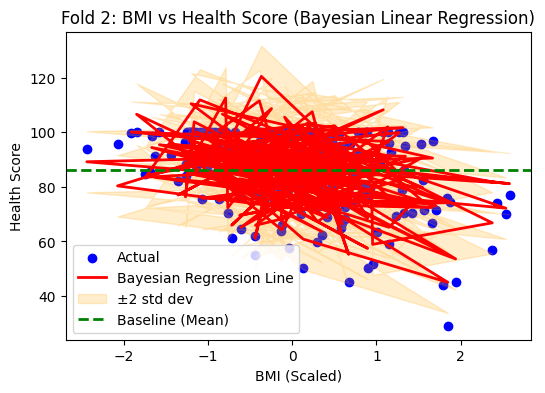

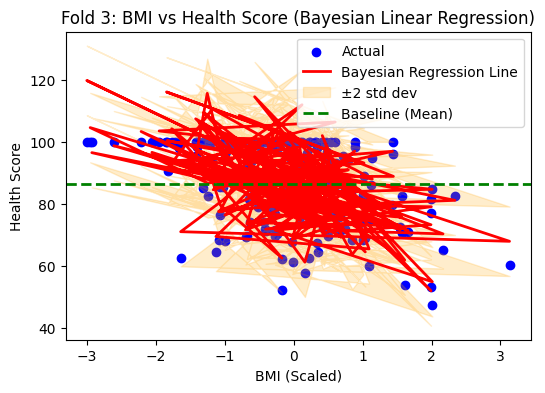

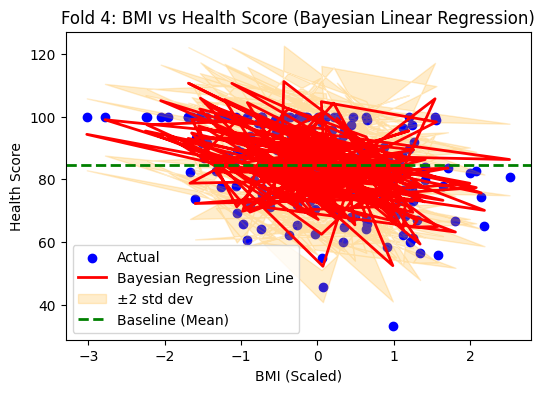

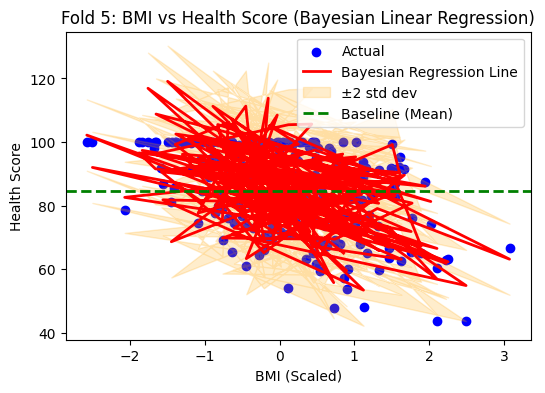

MSE scores per fold: [37.20851390620187, 31.29302367000657, 31.72177866550598, 26.868668626103663, 32.77548658922685]
Average MSE: 31.97349429140899
R2 scores per fold: [0.8091496947071036, 0.8427136607234291, 0.8061478285433791, 0.8384447139194814, 0.837232311923617]
Average R2: 0.826737641963402


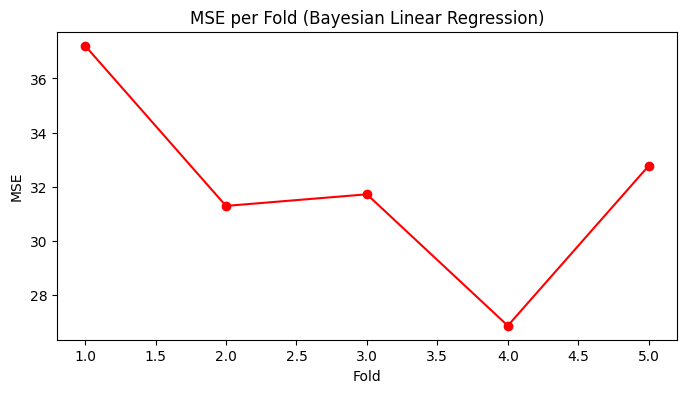

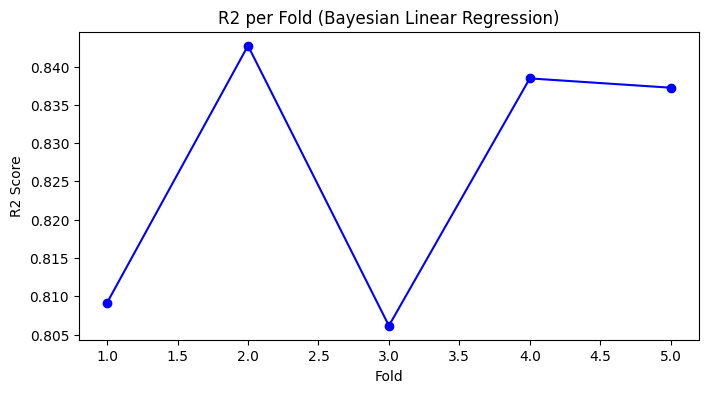


Mutual Information of each feature:
Age: 0.0307
BMI: 0.1256
Exercise_Frequency: 0.0235
Diet_Quality: 0.3248
Sleep_Hours: 0.0806
Smoking_Status: 0.0031
Alcohol_Consumption: 0.0552

Bayesian Linear Regression Coefficients (Average across folds):
Age: -2.7932
BMI: -5.6364
Exercise_Frequency: 3.5486
Diet_Quality: 9.0534
Sleep_Hours: 3.6745
Smoking_Status: -1.8143
Alcohol_Consumption: -1.9355

✅ Results saved as 'kfold_bayesian_metrics.csv', 'mutual_information_bayesian.csv', and 'bayesian_coefficients.csv'


In [80]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression

# -----------------------------
# 1️⃣ Features and Target
# -----------------------------
features = ["Age", "BMI", "Exercise_Frequency", "Diet_Quality",
            "Sleep_Hours", "Smoking_Status", "Alcohol_Consumption"]
target = "Health_Score"

X = data[features]
y = data[target]

# -----------------------------
# 2️⃣ Scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 3️⃣ K-Fold CV Setup (5 folds)
# -----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = BayesianRidge()

mse_scores = []
r2_scores = []
coef_list = []

fold = 1

for train_index, test_index in kf.split(X_scaled):
    # Split data
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred, y_std = model.predict(X_test, return_std=True)  # prediction with uncertainty
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)
    coef_list.append(model.coef_)
    
    # -----------------------------
    # 4️⃣ Scatter Plot (BMI vs Health Score)
    # -----------------------------
    plt.figure(figsize=(6,4))
    plt.scatter(X_test[:, features.index("BMI")], y_test, color='blue', label='Actual')
    plt.plot(X_test[:, features.index("BMI")], y_pred, color='red', linewidth=2, label='Bayesian Regression Line')
    plt.fill_between(
        X_test[:, features.index("BMI")],
        y_pred - 2*y_std,
        y_pred + 2*y_std,
        color='orange', alpha=0.2, label='±2 std dev'
    )
    plt.axhline(y=y_test.mean(), color='green', linestyle='--', linewidth=2, label='Baseline (Mean)')
    plt.xlabel("BMI (Scaled)")
    plt.ylabel("Health Score")
    plt.title(f"Fold {fold}: BMI vs Health Score (Bayesian Linear Regression)")
    plt.legend()
    plt.show()
    
    fold += 1

# -----------------------------
# 5️⃣ Metrics
# -----------------------------
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)
avg_coef = np.mean(coef_list, axis=0)

print("MSE scores per fold:", mse_scores)
print("Average MSE:", avg_mse)
print("R2 scores per fold:", r2_scores)
print("Average R2:", avg_r2)

# -----------------------------
# 6️⃣ Plot MSE & R2 per Fold
# -----------------------------
plt.figure(figsize=(8,4))
plt.plot(range(1,6), mse_scores, marker='o', linestyle='-', color='red')
plt.title("MSE per Fold (Bayesian Linear Regression)")
plt.xlabel("Fold")
plt.ylabel("MSE")
plt.show()

plt.figure(figsize=(8,4))
plt.plot(range(1,6), r2_scores, marker='o', linestyle='-', color='blue')
plt.title("R2 per Fold (Bayesian Linear Regression)")
plt.xlabel("Fold")
plt.ylabel("R2 Score")
plt.show()

# -----------------------------
# 7️⃣ Mutual Information (All Features)
# -----------------------------
mi = mutual_info_regression(X_scaled, y)
mi_dict = dict(zip(features, mi))

print("\nMutual Information of each feature:")
for f, score in mi_dict.items():
    print(f"{f}: {score:.4f}")

# -----------------------------
# 8️⃣ Bayesian Coefficients
# -----------------------------
coef_dict = dict(zip(features, avg_coef))
print("\nBayesian Linear Regression Coefficients (Average across folds):")
for f, coef in coef_dict.items():
    print(f"{f}: {coef:.4f}")

# -----------------------------
# 9️⃣ Save final results
# -----------------------------
results_df = pd.DataFrame({
    "Fold": list(range(1,6)),
    "MSE": mse_scores,
    "R2": r2_scores
})
results_df.to_csv("kfold_bayesian_metrics.csv", index=False)

mi_df = pd.DataFrame(list(mi_dict.items()), columns=["Feature", "Mutual Information"])
mi_df.to_csv("mutual_information_bayesian.csv", index=False)

coef_df = pd.DataFrame(list(coef_dict.items()), columns=["Feature", "Bayesian Coefficient"])
coef_df.to_csv("bayesian_coefficients.csv", index=False)

print("\n✅ Results saved as 'kfold_bayesian_metrics.csv', 'mutual_information_bayesian.csv', and 'bayesian_coefficients.csv'")


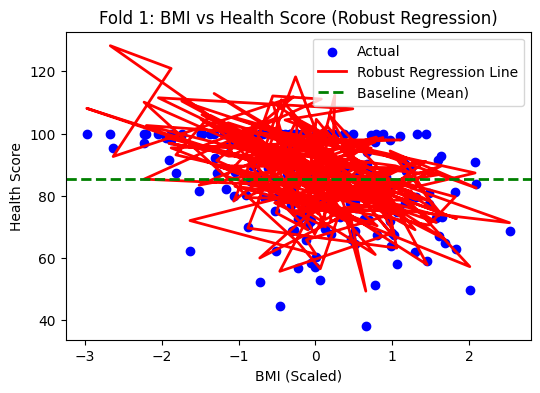

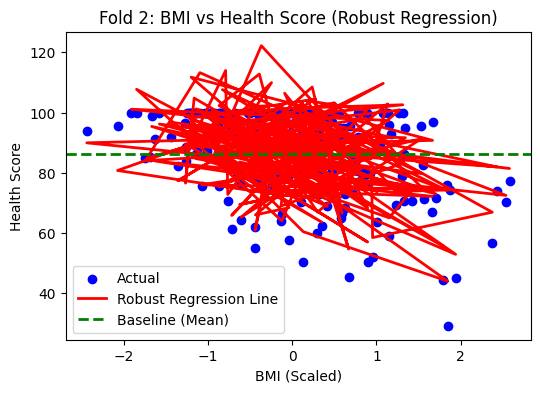

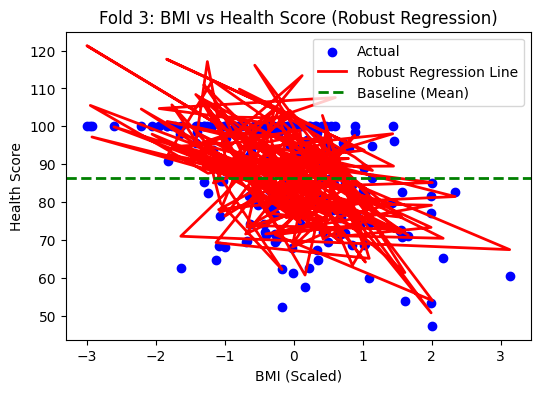

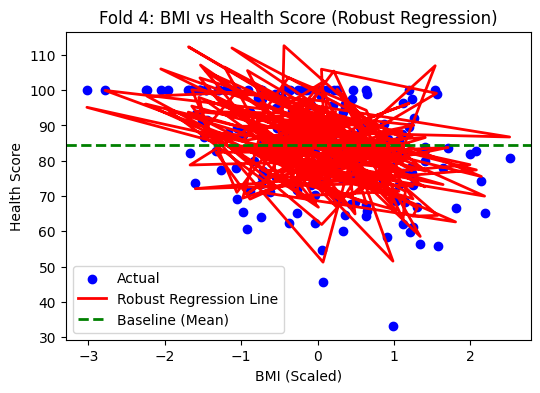

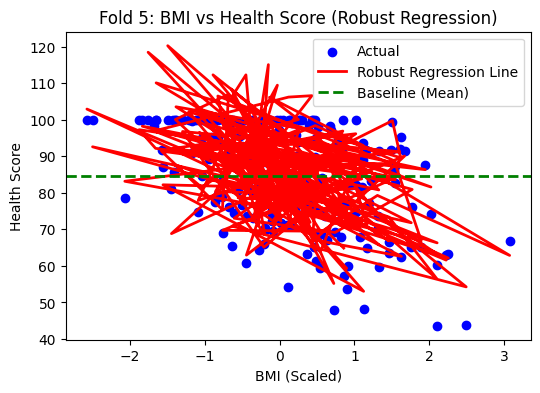

MSE scores per fold: [39.202482873441305, 30.897401021833716, 32.381204712658615, 26.140278204431763, 32.67891282310941]
Average MSE: 32.26005592709496
R2 scores per fold: [0.7989222078716571, 0.8447021562655092, 0.8021180680276297, 0.8428243623713287, 0.8377119108640316]
Average R2: 0.8252557410800312


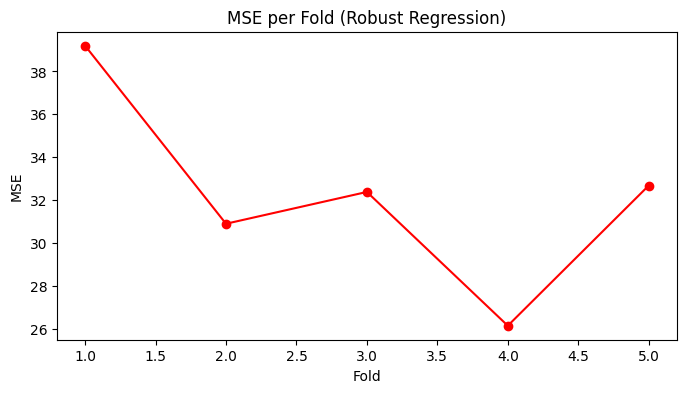

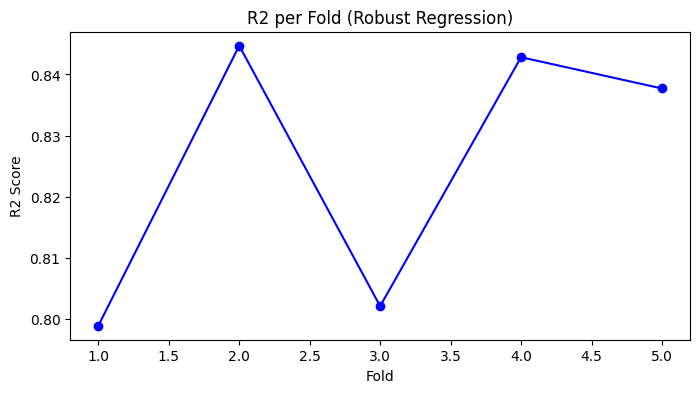


Mutual Information of each feature:
Age: 0.0327
BMI: 0.1228
Exercise_Frequency: 0.0552
Diet_Quality: 0.3236
Sleep_Hours: 0.0794
Smoking_Status: 0.0045
Alcohol_Consumption: 0.0521

Robust Regression Coefficients (Average across folds):
Age: -2.8640
BMI: -5.8508
Exercise_Frequency: 3.6458
Diet_Quality: 9.3425
Sleep_Hours: 3.9005
Smoking_Status: -1.8584
Alcohol_Consumption: -1.9746

✅ Results saved as 'kfold_robust_metrics.csv', 'mutual_information_robust.csv', and 'robust_coefficients.csv'


In [81]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression

# -----------------------------
# 1️⃣ Features and Target
# -----------------------------
features = ["Age", "BMI", "Exercise_Frequency", "Diet_Quality",
            "Sleep_Hours", "Smoking_Status", "Alcohol_Consumption"]
target = "Health_Score"

X = data[features]
y = data[target]

# -----------------------------
# 2️⃣ Scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 3️⃣ K-Fold CV Setup (5 folds)
# -----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = HuberRegressor(alpha=0.0, max_iter=1000)  # alpha=0 for minimal regularization

mse_scores = []
r2_scores = []
coef_list = []

fold = 1

for train_index, test_index in kf.split(X_scaled):
    # Split data
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)
    coef_list.append(model.coef_)
    
    # -----------------------------
    # 4️⃣ Scatter Plot (BMI vs Health Score)
    # -----------------------------
    plt.figure(figsize=(6,4))
    plt.scatter(X_test[:, features.index("BMI")], y_test, color='blue', label='Actual')
    plt.plot(X_test[:, features.index("BMI")], y_pred, color='red', linewidth=2, label='Robust Regression Line')
    plt.axhline(y=y_test.mean(), color='green', linestyle='--', linewidth=2, label='Baseline (Mean)')
    plt.xlabel("BMI (Scaled)")
    plt.ylabel("Health Score")
    plt.title(f"Fold {fold}: BMI vs Health Score (Robust Regression)")
    plt.legend()
    plt.show()
    
    fold += 1

# -----------------------------
# 5️⃣ Metrics
# -----------------------------
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)
avg_coef = np.mean(coef_list, axis=0)

print("MSE scores per fold:", mse_scores)
print("Average MSE:", avg_mse)
print("R2 scores per fold:", r2_scores)
print("Average R2:", avg_r2)

# -----------------------------
# 6️⃣ Plot MSE & R2 per Fold
# -----------------------------
plt.figure(figsize=(8,4))
plt.plot(range(1,6), mse_scores, marker='o', linestyle='-', color='red')
plt.title("MSE per Fold (Robust Regression)")
plt.xlabel("Fold")
plt.ylabel("MSE")
plt.show()

plt.figure(figsize=(8,4))
plt.plot(range(1,6), r2_scores, marker='o', linestyle='-', color='blue')
plt.title("R2 per Fold (Robust Regression)")
plt.xlabel("Fold")
plt.ylabel("R2 Score")
plt.show()

# -----------------------------
# 7️⃣ Mutual Information (All Features)
# -----------------------------
mi = mutual_info_regression(X_scaled, y)
mi_dict = dict(zip(features, mi))

print("\nMutual Information of each feature:")
for f, score in mi_dict.items():
    print(f"{f}: {score:.4f}")

# -----------------------------
# 8️⃣ Robust Regression Coefficients
# -----------------------------
coef_dict = dict(zip(features, avg_coef))
print("\nRobust Regression Coefficients (Average across folds):")
for f, coef in coef_dict.items():
    print(f"{f}: {coef:.4f}")

# -----------------------------
# 9️⃣ Save final results
# -----------------------------
results_df = pd.DataFrame({
    "Fold": list(range(1,6)),
    "MSE": mse_scores,
    "R2": r2_scores
})
results_df.to_csv("kfold_robust_metrics.csv", index=False)

mi_df = pd.DataFrame(list(mi_dict.items()), columns=["Feature", "Mutual Information"])
mi_df.to_csv("mutual_information_robust.csv", index=False)

coef_df = pd.DataFrame(list(coef_dict.items()), columns=["Feature", "Robust Coefficient"])
coef_df.to_csv("robust_coefficients.csv", index=False)

print("\n✅ Results saved as 'kfold_robust_metrics.csv', 'mutual_information_robust.csv', and 'robust_coefficients.csv'")


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Load metrics from saved CSVs (or manually set)
# -----------------------------
# Example: if you have saved metrics per method as CSVs
methods = ["Linear", "Ridge", "Lasso", "ElasticNet", "Bayesian", "Robust"]

# Load metrics CSVs or use manually saved values
avg_mse = []
avg_r2 = []
avg_mi = []

for method in methods:
    # Load metrics
    metrics_file = f"kfold_{method.lower()}_metrics.csv"
    mi_file = f"mutual_information_{method.lower()}.csv"
    
    # Read metrics CSV
    df = pd.read_csv(metrics_file)
    avg_mse.append(df['MSE'].mean())
    avg_r2.append(df['R2'].mean())
    
    # Read MI CSV and take average MI across all features
    mi_df = pd.read_csv(mi_file)
    avg_mi.append(mi_df['Mutual Information'].mean())

# -----------------------------
# 2️⃣ Create comparison DataFrame
# -----------------------------
comparison_df = pd.DataFrame({
    "Method": methods,
    "Average MSE": avg_mse,
    "Average R2": avg_r2,
    "Average MI": avg_mi
})

print(comparison_df)

# -----------------------------
# 3️⃣ Plot metrics in single figure
# -----------------------------
x = np.arange(len(methods))
width = 0.25

fig, ax1 = plt.subplots(figsize=(12,6))

# MSE bar (left axis)
bar1 = ax1.bar(x - width, avg_mse, width, color='red', label='Average MSE')
ax1.set_ylabel('Average MSE', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_xticks(x)
ax1.set_xticklabels(methods)

# R2 bar (left axis)
bar2 = ax1.bar(x, avg_r2, width, color='blue', label='Average R2')
ax1.set_ylabel('Average MSE / R2', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# MI bar (right axis)
ax2 = ax1.twinx()
bar3 = ax2.bar(x + width, avg_mi, width, color='green', label='Average MI')
ax2.set_ylabel('Average MI', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legend
bars = [bar1, bar2, bar3]
labels = [b.get_label() for b in bars]
ax1.legend(labels, loc='upper left')

plt.title("Comparison of Regression Methods: MSE, R2, and Average MI")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'mutual_information_linear.csv'